In [6]:
import os
from copy import deepcopy

from tqdm import tqdm
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from Environment import Environment, make_one_hot, give_mapping
from Agent import Agent

In [7]:
def give_prev_steps(prev_steps_assist, steps):
    prev_steps_assist = [[0,0,0,0,-1,-1] for i in range(steps-1)]
    return prev_steps_assist

In [8]:
N = 20
batch_size = 5
n_epochs = 5
alpha = 0.0005
memory_len = 6

agent = Agent(gamma=0.99, alpha=alpha, gae_lambda=0.95, policy_clip=0.1,\
              batch_size=batch_size, N=N, n_epochs=n_epochs, memory_len = memory_len)

n_games = 15000
best_score = -50
score_history = []

learn_iters = 0
avg_score = 0
n_steps = 0
max_steps = 40
reached = 0

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
tf_op_layer_strided_slice_4 (Te [(None, 2)]          0           input_8[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_strided_slice_5 (Te [(None, 2)]          0           input_8[0][0]                    
__________________________________________________________________________________________________
subtract_2 (Subtract)           (None, 2)            0           tf_op_layer_strided_slice_4[0][0]
                                                                 tf_op_layer_strided_sl

In [9]:
avg_scores = []

for i in tqdm(range(n_games)):
    env = Environment()
    env_cell_mapping = give_mapping(env.cells)
    layout = env_cell_mapping[np.newaxis, :, :, np.newaxis]
    done = False
    episode_reward = 0
    start, dest = env.give_start_dest()
    user_state = [start[0], start[1], dest[0], dest[1]]
    prev_steps_assist = []
    prev_steps_assist = give_prev_steps(prev_steps_assist, memory_len)
    step = 0
    episode_reward = 0
    curr_loc = user_state[:2]
    target_loc = user_state[2:]
    
    while not done and step<max_steps:
        step+=1
        n_steps+=1
        user_action, user_prob, asst_action, asst_prob, vals, asst_state, asst_output_one_hot\
        = agent.choose_action(user_state, layout, prev_steps_assist)
        
        
        new_loc, reward, _, done = env.step(user_action, asst_action + 1, target_loc, curr_loc)
        
        if done:
            reached+=1
        
        agent.remember(user_state, asst_state, layout, asst_output_one_hot,\
                       user_action, user_prob, asst_action, asst_prob, vals, reward, done)
         
        user_state = new_loc + target_loc
        prev_steps_assist = asst_state[1:]
        curr_loc = new_loc
        episode_reward+=reward
        
        if n_steps%N==0:
            agent.learn()
            learn_iters+=1
            
    score_history.append(episode_reward)
    avg_score = np.mean(score_history[-50:])
    
    if avg_score>best_score:
        best_score = avg_score
        agent.save_models()
    
    if i%100==0:
        max_steps-=1
        max_steps = max(max_steps, 6)
        avg_scores.append(avg_score)
        
    if i%100==0:
        print(f'Episode: {i}; Score: {episode_reward}; Avg_score: {avg_score}; Timesteps: {n_steps}; Learning Steps: {learn_iters}; Reached: {reached}')
        reached = 0

  0%|                                                                              | 1/15000 [00:02<9:46:10,  2.34s/it]

Saving Models
Episode: 0; Score: -40; Avg_score: -40.0; Timesteps: 40; Learning Steps: 2; Reached: 0


  0%|                                                                              | 2/15000 [00:03<8:38:11,  2.07s/it]

Saving Models


  0%|                                                                              | 3/15000 [00:05<8:31:05,  2.04s/it]

Saving Models


  0%|▎                                                                            | 57/15000 [01:50<5:40:22,  1.37s/it]

Saving Models
Saving Models


  0%|▎                                                                            | 61/15000 [01:55<5:00:30,  1.21s/it]

Saving Models


  0%|▎                                                                            | 62/15000 [01:56<5:01:37,  1.21s/it]

Saving Models
Saving Models


  0%|▎                                                                            | 64/15000 [01:57<4:01:50,  1.03it/s]

Saving Models


  0%|▎                                                                            | 65/15000 [01:58<3:58:39,  1.04it/s]

Saving Models


  0%|▎                                                                            | 66/15000 [02:00<4:28:53,  1.08s/it]

Saving Models


  0%|▎                                                                            | 67/15000 [02:02<5:51:43,  1.41s/it]

Saving Models


  0%|▎                                                                            | 69/15000 [02:05<6:00:43,  1.45s/it]

Saving Models


  0%|▎                                                                            | 72/15000 [02:10<6:00:56,  1.45s/it]

Saving Models
Saving Models


  0%|▍                                                                            | 74/15000 [02:10<3:20:06,  1.24it/s]

Saving Models


  1%|▍                                                                            | 81/15000 [02:20<5:09:19,  1.24s/it]

Saving Models
Saving Models


  1%|▍                                                                            | 82/15000 [02:21<5:06:57,  1.23s/it]

Saving Models


  1%|▍                                                                            | 84/15000 [02:23<4:56:54,  1.19s/it]

Saving Models


  1%|▍                                                                            | 85/15000 [02:24<4:59:04,  1.20s/it]

Saving Models
Saving Models


  1%|▍                                                                            | 87/15000 [02:26<4:04:28,  1.02it/s]

Saving Models
Saving Models


  1%|▍                                                                            | 89/15000 [02:27<3:38:24,  1.14it/s]

Saving Models


  1%|▍                                                                            | 90/15000 [02:27<2:57:57,  1.40it/s]

Saving Models


  1%|▍                                                                            | 91/15000 [02:29<3:36:30,  1.15it/s]

Saving Models


  1%|▍                                                                            | 94/15000 [02:35<6:15:55,  1.51s/it]

Saving Models


  1%|▍                                                                            | 95/15000 [02:36<5:56:29,  1.44s/it]

Saving Models


  1%|▍                                                                            | 96/15000 [02:36<4:32:02,  1.10s/it]

Saving Models


  1%|▌                                                                            | 99/15000 [02:41<5:09:11,  1.25s/it]

Saving Models


  1%|▌                                                                           | 101/15000 [02:45<6:31:32,  1.58s/it]

Saving Models
Episode: 100; Score: -17; Avg_score: -13.52; Timesteps: 2857; Learning Steps: 142; Reached: 49


  1%|▌                                                                           | 102/15000 [02:46<6:09:23,  1.49s/it]

Saving Models


  1%|▌                                                                           | 104/15000 [02:47<4:18:22,  1.04s/it]

Saving Models


  1%|▌                                                                           | 105/15000 [02:49<4:28:24,  1.08s/it]

Saving Models
Saving Models


  1%|▌                                                                           | 109/15000 [02:52<3:47:04,  1.09it/s]

Saving Models
Saving Models


  1%|▌                                                                           | 112/15000 [02:55<3:23:15,  1.22it/s]

Saving Models


  1%|▌                                                                           | 118/15000 [03:01<4:09:13,  1.00s/it]

Saving Models


  1%|▌                                                                           | 119/15000 [03:02<4:09:26,  1.01s/it]

Saving Models


  1%|▌                                                                           | 120/15000 [03:04<4:21:11,  1.05s/it]

Saving Models
Saving Models


  1%|▋                                                                           | 126/15000 [03:10<5:34:57,  1.35s/it]

Saving Models


  1%|▋                                                                           | 128/15000 [03:12<4:17:41,  1.04s/it]

Saving Models


  1%|▋                                                                           | 129/15000 [03:13<4:40:10,  1.13s/it]

Saving Models


  1%|▋                                                                           | 132/15000 [03:14<2:48:48,  1.47it/s]

Saving Models
Saving Models


  1%|▋                                                                           | 134/15000 [03:16<3:03:14,  1.35it/s]

Saving Models


  1%|▋                                                                           | 135/15000 [03:17<3:27:21,  1.19it/s]

Saving Models


  1%|▋                                                                           | 141/15000 [03:21<2:41:23,  1.53it/s]

Saving Models


  1%|▋                                                                           | 142/15000 [03:21<2:11:09,  1.89it/s]

Saving Models


  1%|▋                                                                           | 143/15000 [03:23<4:23:15,  1.06s/it]

Saving Models


  1%|▋                                                                           | 146/15000 [03:26<3:28:35,  1.19it/s]

Saving Models
Saving Models


  1%|▋                                                                           | 148/15000 [03:26<2:34:59,  1.60it/s]

Saving Models


  1%|▊                                                                           | 150/15000 [03:28<3:54:27,  1.06it/s]

Saving Models


  1%|▊                                                                           | 151/15000 [03:30<4:14:55,  1.03s/it]

Saving Models


  1%|▊                                                                           | 153/15000 [03:31<3:12:12,  1.29it/s]

Saving Models
Saving Models


  1%|▊                                                                           | 154/15000 [03:31<2:27:00,  1.68it/s]

Saving Models


  1%|▊                                                                           | 155/15000 [03:32<3:01:23,  1.36it/s]

Saving Models


  1%|▊                                                                           | 157/15000 [03:32<1:51:56,  2.21it/s]

Saving Models


  1%|▊                                                                           | 158/15000 [03:34<2:43:15,  1.52it/s]

Saving Models
Saving Models


  1%|▊                                                                           | 161/15000 [03:35<2:46:07,  1.49it/s]

Saving Models
Saving Models


  1%|▊                                                                           | 163/15000 [03:35<2:11:12,  1.88it/s]

Saving Models


  1%|▊                                                                           | 164/15000 [03:37<3:09:58,  1.30it/s]

Saving Models
Saving Models


  1%|▊                                                                           | 166/15000 [03:38<2:54:26,  1.42it/s]

Saving Models
Saving Models


  1%|▊                                                                           | 168/15000 [03:38<1:55:44,  2.14it/s]

Saving Models


  1%|▊                                                                           | 170/15000 [03:39<2:04:23,  1.99it/s]

Saving Models


  1%|▉                                                                           | 173/15000 [03:42<2:37:56,  1.56it/s]

Saving Models


  1%|▉                                                                           | 175/15000 [03:44<3:35:27,  1.15it/s]

Saving Models


  1%|▉                                                                           | 176/15000 [03:44<2:54:02,  1.42it/s]

Saving Models


  1%|▉                                                                           | 178/15000 [03:46<2:31:57,  1.63it/s]

Saving Models


  1%|▉                                                                           | 179/15000 [03:47<3:01:12,  1.36it/s]

Saving Models


  1%|▉                                                                           | 181/15000 [03:48<2:55:30,  1.41it/s]

Saving Models


  1%|▉                                                                           | 182/15000 [03:48<2:19:35,  1.77it/s]

Saving Models


  1%|▉                                                                           | 184/15000 [03:49<2:32:25,  1.62it/s]

Saving Models


  1%|▉                                                                           | 186/15000 [03:50<2:39:49,  1.54it/s]

Saving Models


  1%|▉                                                                           | 194/15000 [03:56<3:29:44,  1.18it/s]

Saving Models


  1%|█                                                                           | 201/15000 [04:01<2:34:51,  1.59it/s]

Episode: 200; Score: 4; Avg_score: 0.94; Timesteps: 4095; Learning Steps: 204; Reached: 98


  1%|█                                                                           | 207/15000 [04:04<1:29:32,  2.75it/s]

Saving Models


  2%|█▎                                                                          | 266/15000 [04:38<1:43:44,  2.37it/s]

Saving Models


  2%|█▎                                                                          | 268/15000 [04:40<2:02:20,  2.01it/s]

Saving Models


  2%|█▎                                                                          | 271/15000 [04:41<1:38:36,  2.49it/s]

Saving Models


  2%|█▍                                                                          | 273/15000 [04:42<2:05:26,  1.96it/s]

Saving Models


  2%|█▍                                                                          | 274/15000 [04:42<1:54:10,  2.15it/s]

Saving Models


  2%|█▍                                                                          | 275/15000 [04:43<2:36:24,  1.57it/s]

Saving Models
Saving Models

  2%|█▍                                                                          | 276/15000 [04:43<2:03:23,  1.99it/s]

  2%|█▍                                                                          | 277/15000 [04:44<1:45:21,  2.33it/s]

Saving Models


  2%|█▍                                                                          | 279/15000 [04:45<2:00:33,  2.04it/s]

Saving Models


  2%|█▍                                                                          | 287/15000 [04:50<2:18:09,  1.77it/s]

Saving Models


  2%|█▍                                                                          | 289/15000 [04:51<2:38:36,  1.55it/s]

Saving Models


  2%|█▍                                                                          | 290/15000 [04:51<2:09:24,  1.89it/s]

Saving Models
Saving Models

  2%|█▍                                                                          | 291/15000 [04:51<1:44:54,  2.34it/s]

  2%|█▍                                                                          | 292/15000 [04:53<2:36:25,  1.57it/s]

Saving Models


  2%|█▍                                                                          | 294/15000 [04:54<2:19:53,  1.75it/s]

Saving Models


  2%|█▍                                                                          | 295/15000 [04:54<1:52:19,  2.18it/s]

Saving Models


  2%|█▌                                                                          | 301/15000 [04:57<2:33:05,  1.60it/s]

Episode: 300; Score: 4; Avg_score: 3.06; Timesteps: 5002; Learning Steps: 250; Reached: 100


  2%|█▌                                                                          | 303/15000 [04:58<1:36:36,  2.54it/s]

Saving Models


  2%|█▌                                                                          | 304/15000 [04:59<2:31:05,  1.62it/s]

Saving Models
Saving Models


  3%|██                                                                          | 401/15000 [05:47<1:21:48,  2.97it/s]

Episode: 400; Score: 1; Avg_score: 3.1; Timesteps: 5832; Learning Steps: 291; Reached: 100


  3%|██                                                                          | 412/15000 [05:51<1:34:10,  2.58it/s]

Saving Models


  3%|██                                                                          | 414/15000 [05:52<1:42:27,  2.37it/s]

Saving Models
Saving Models


  3%|██                                                                          | 416/15000 [05:52<1:06:16,  3.67it/s]

Saving Models


  3%|██▏                                                                         | 421/15000 [05:55<1:30:02,  2.70it/s]

Saving Models


  3%|██▏                                                                         | 427/15000 [05:58<1:32:52,  2.62it/s]

Saving Models


  3%|██▍                                                                         | 470/15000 [06:16<1:32:36,  2.61it/s]

Saving Models
Saving Models


  3%|██▍                                                                         | 472/15000 [06:16<1:13:11,  3.31it/s]

Saving Models


  3%|██▍                                                                         | 474/15000 [06:17<1:28:52,  2.72it/s]

Saving Models


  3%|██▍                                                                         | 481/15000 [06:20<2:17:01,  1.77it/s]

Saving Models
Saving Models


  3%|██▍                                                                         | 483/15000 [06:21<1:28:22,  2.74it/s]

Saving Models


  3%|██▌                                                                         | 498/15000 [06:27<1:29:24,  2.70it/s]

Saving Models
Saving Models


  3%|██▌                                                                         | 501/15000 [06:28<1:32:08,  2.62it/s]

Episode: 500; Score: 3; Avg_score: 4.14; Timesteps: 6552; Learning Steps: 327; Reached: 100


  3%|██▋                                                                           | 517/15000 [06:34<56:41,  4.26it/s]

Saving Models


  4%|██▋                                                                         | 529/15000 [06:38<1:24:09,  2.87it/s]

Saving Models


  4%|███                                                                         | 602/15000 [07:10<1:10:02,  3.43it/s]

Episode: 600; Score: 4; Avg_score: 3.92; Timesteps: 7250; Learning Steps: 362; Reached: 100


  5%|███▌                                                                        | 698/15000 [07:48<1:19:36,  2.99it/s]

Saving Models


  5%|███▌                                                                        | 701/15000 [07:49<1:41:47,  2.34it/s]

Episode: 700; Score: 4; Avg_score: 4.38; Timesteps: 7937; Learning Steps: 396; Reached: 100


  5%|███▌                                                                        | 705/15000 [07:50<1:19:13,  3.01it/s]

Saving Models


  5%|███▌                                                                        | 706/15000 [07:51<2:04:29,  1.91it/s]

Saving Models


  5%|███▊                                                                        | 742/15000 [08:04<1:05:51,  3.61it/s]

Saving Models


  5%|████                                                                        | 802/15000 [08:26<1:38:48,  2.39it/s]

Episode: 800; Score: 4; Avg_score: 4.44; Timesteps: 8591; Learning Steps: 429; Reached: 100


  6%|████▏                                                                       | 832/15000 [08:37<1:08:10,  3.46it/s]

Saving Models
Saving Models


  6%|████▏                                                                       | 835/15000 [08:38<1:24:03,  2.81it/s]

Saving Models


  6%|████▌                                                                       | 902/15000 [09:03<1:08:18,  3.44it/s]

Episode: 900; Score: 5; Avg_score: 4.06; Timesteps: 9265; Learning Steps: 463; Reached: 100


  7%|█████                                                                      | 1002/15000 [09:43<1:24:00,  2.78it/s]

Episode: 1000; Score: 3; Avg_score: 4.32; Timesteps: 9953; Learning Steps: 497; Reached: 100


  7%|█████▌                                                                     | 1102/15000 [10:22<1:30:49,  2.55it/s]

Episode: 1100; Score: 4; Avg_score: 4.42; Timesteps: 10602; Learning Steps: 530; Reached: 100


  8%|██████                                                                       | 1187/15000 [10:51<48:14,  4.77it/s]

Saving Models
Saving Models
Saving Models


  8%|██████                                                                       | 1193/15000 [10:53<57:25,  4.01it/s]

Saving Models


  8%|██████                                                                     | 1201/15000 [10:56<1:33:52,  2.45it/s]

Episode: 1200; Score: 3; Avg_score: 4.68; Timesteps: 11252; Learning Steps: 562; Reached: 100


  9%|██████▌                                                                    | 1301/15000 [11:32<1:14:58,  3.05it/s]

Episode: 1300; Score: 4; Avg_score: 4.32; Timesteps: 11910; Learning Steps: 595; Reached: 100


  9%|███████                                                                    | 1402/15000 [12:07<1:27:35,  2.59it/s]

Episode: 1400; Score: 5; Avg_score: 4.28; Timesteps: 12567; Learning Steps: 628; Reached: 100


 10%|███████▌                                                                   | 1501/15000 [12:41<1:00:12,  3.74it/s]

Episode: 1500; Score: 4; Avg_score: 4.8; Timesteps: 13195; Learning Steps: 659; Reached: 100


 10%|███████▌                                                                   | 1508/15000 [12:43<1:01:54,  3.63it/s]

Saving Models


 10%|███████▌                                                                   | 1515/15000 [12:46<2:03:34,  1.82it/s]

Saving Models


 11%|████████                                                                   | 1601/15000 [13:18<1:08:09,  3.28it/s]

Episode: 1600; Score: 10; Avg_score: 4.26; Timesteps: 13849; Learning Steps: 692; Reached: 100


 11%|████████▌                                                                  | 1702/15000 [13:53<1:14:35,  2.97it/s]

Episode: 1700; Score: 4; Avg_score: 5.02; Timesteps: 14484; Learning Steps: 724; Reached: 100


 12%|█████████                                                                  | 1801/15000 [14:30<1:32:51,  2.37it/s]

Episode: 1800; Score: 4; Avg_score: 4.24; Timesteps: 15141; Learning Steps: 757; Reached: 100


 13%|█████████▊                                                                   | 1902/15000 [15:04<59:18,  3.68it/s]

Episode: 1900; Score: 5; Avg_score: 5.02; Timesteps: 15773; Learning Steps: 788; Reached: 100


 13%|██████████                                                                 | 2001/15000 [15:41<1:05:35,  3.30it/s]

Episode: 2000; Score: 4; Avg_score: 4.42; Timesteps: 16434; Learning Steps: 821; Reached: 100


 14%|██████████▏                                                                | 2038/15000 [15:53<1:10:44,  3.05it/s]

Saving Models
Saving Models


 14%|██████████▊                                                                  | 2102/15000 [16:15<57:14,  3.76it/s]

Episode: 2100; Score: 4; Avg_score: 4.64; Timesteps: 17046; Learning Steps: 852; Reached: 100


 15%|███████████                                                                | 2201/15000 [16:51<1:21:48,  2.61it/s]

Episode: 2200; Score: 4; Avg_score: 4.36; Timesteps: 17689; Learning Steps: 884; Reached: 100


 15%|███████████▊                                                                 | 2302/15000 [17:28<49:42,  4.26it/s]

Episode: 2300; Score: 3; Avg_score: 4.26; Timesteps: 18351; Learning Steps: 917; Reached: 100


 16%|████████████                                                                 | 2338/15000 [17:39<52:46,  4.00it/s]

Saving Models


 16%|███████████▋                                                               | 2345/15000 [17:42<1:24:02,  2.51it/s]

Saving Models
Saving Models


 16%|███████████▊                                                               | 2352/15000 [17:43<1:00:18,  3.50it/s]

Saving Models


 16%|████████████                                                               | 2402/15000 [18:02<1:28:25,  2.37it/s]

Episode: 2400; Score: 4; Avg_score: 4.44; Timesteps: 18961; Learning Steps: 948; Reached: 100


 17%|████████████▊                                                                | 2502/15000 [18:36<54:19,  3.83it/s]

Episode: 2500; Score: 4; Avg_score: 5.34; Timesteps: 19585; Learning Steps: 979; Reached: 100


 17%|█████████████                                                              | 2601/15000 [19:12<1:16:42,  2.69it/s]

Episode: 2600; Score: 1; Avg_score: 4.3; Timesteps: 20235; Learning Steps: 1011; Reached: 100


 18%|█████████████▉                                                               | 2703/15000 [19:47<52:10,  3.93it/s]

Episode: 2700; Score: 4; Avg_score: 4.86; Timesteps: 20869; Learning Steps: 1043; Reached: 100


 19%|██████████████                                                             | 2802/15000 [20:23<1:03:01,  3.23it/s]

Episode: 2800; Score: 3; Avg_score: 4.38; Timesteps: 21510; Learning Steps: 1075; Reached: 100


 19%|██████████████▌                                                            | 2900/15000 [20:58<1:01:28,  3.28it/s]

Episode: 2900; Score: 10; Avg_score: 4.56; Timesteps: 22159; Learning Steps: 1107; Reached: 100


 20%|███████████████                                                            | 3002/15000 [21:35<1:17:11,  2.59it/s]

Episode: 3000; Score: 7; Avg_score: 4.44; Timesteps: 22803; Learning Steps: 1140; Reached: 100


 20%|███████████████▌                                                             | 3041/15000 [21:46<37:03,  5.38it/s]

Saving Models


 20%|███████████████▌                                                             | 3043/15000 [21:47<58:10,  3.43it/s]

Saving Models
Saving Models


 20%|███████████████▋                                                             | 3044/15000 [21:47<49:10,  4.05it/s]

Saving Models


 20%|███████████████▋                                                             | 3052/15000 [21:50<52:53,  3.76it/s]

Saving Models
Saving Models


 20%|███████████████▎                                                           | 3058/15000 [21:52<1:12:54,  2.73it/s]

Saving Models
Saving Models


 21%|███████████████▌                                                           | 3103/15000 [22:08<1:07:05,  2.96it/s]

Episode: 3100; Score: 9; Avg_score: 4.6; Timesteps: 23383; Learning Steps: 1169; Reached: 99


 21%|████████████████                                                           | 3201/15000 [22:44<1:07:41,  2.91it/s]

Episode: 3200; Score: 3; Avg_score: 3.38; Timesteps: 24052; Learning Steps: 1202; Reached: 96


 22%|████████████████▉                                                            | 3303/15000 [23:19<53:50,  3.62it/s]

Episode: 3300; Score: 7; Avg_score: 2.42; Timesteps: 24672; Learning Steps: 1233; Reached: 77


 23%|█████████████████                                                          | 3400/15000 [23:48<1:08:55,  2.81it/s]

Episode: 3400; Score: -6; Avg_score: -1.86; Timesteps: 25199; Learning Steps: 1259; Reached: 38


 23%|█████████████████▌                                                         | 3502/15000 [24:19<1:01:23,  3.12it/s]

Episode: 3500; Score: -6; Avg_score: -1.34; Timesteps: 25742; Learning Steps: 1287; Reached: 37


 24%|██████████████████▍                                                          | 3602/15000 [24:48<46:30,  4.08it/s]

Episode: 3600; Score: 5; Avg_score: 0.68; Timesteps: 26269; Learning Steps: 1313; Reached: 43


 25%|██████████████████▉                                                          | 3701/15000 [25:16<54:18,  3.47it/s]

Episode: 3700; Score: -6; Avg_score: 0.42; Timesteps: 26794; Learning Steps: 1339; Reached: 47


 25%|███████████████████▌                                                         | 3802/15000 [25:45<53:29,  3.49it/s]

Episode: 3800; Score: 5; Avg_score: -0.72; Timesteps: 27350; Learning Steps: 1367; Reached: 43


 26%|████████████████████                                                         | 3903/15000 [26:12<59:30,  3.11it/s]

Episode: 3900; Score: 6; Avg_score: 2.8; Timesteps: 27841; Learning Steps: 1392; Reached: 77


 27%|████████████████████▌                                                        | 4001/15000 [26:39<46:13,  3.97it/s]

Episode: 4000; Score: -6; Avg_score: 2.58; Timesteps: 28355; Learning Steps: 1417; Reached: 73


 27%|█████████████████████                                                        | 4101/15000 [27:05<56:25,  3.22it/s]

Episode: 4100; Score: 5; Avg_score: 4.16; Timesteps: 28854; Learning Steps: 1442; Reached: 74


 28%|█████████████████████▌                                                       | 4202/15000 [27:32<42:50,  4.20it/s]

Episode: 4200; Score: 5; Avg_score: 4.62; Timesteps: 29349; Learning Steps: 1467; Reached: 80


 29%|██████████████████████                                                       | 4302/15000 [27:57<33:44,  5.29it/s]

Episode: 4300; Score: 7; Avg_score: 5.32; Timesteps: 29830; Learning Steps: 1491; Reached: 85


 29%|██████████████████████                                                       | 4310/15000 [27:59<44:51,  3.97it/s]

Saving Models


 29%|██████████████████████▏                                                      | 4315/15000 [28:01<43:57,  4.05it/s]

Saving Models
Saving Models


 29%|██████████████████████▏                                                      | 4323/15000 [28:03<44:10,  4.03it/s]

Saving Models


 29%|██████████████████████▏                                                      | 4332/15000 [28:05<41:53,  4.24it/s]

Saving Models


 29%|██████████████████████▍                                                      | 4368/15000 [28:14<36:55,  4.80it/s]

Saving Models
Saving Models
Saving Models


 29%|██████████████████████▍                                                      | 4372/15000 [28:15<34:54,  5.08it/s]

Saving Models
Saving Models


 29%|██████████████████████▍                                                      | 4374/15000 [28:15<27:56,  6.34it/s]

Saving Models
Saving Models


 29%|██████████████████████▍                                                      | 4376/15000 [28:16<51:23,  3.45it/s]

Saving Models
Saving Models


 29%|██████████████████████▌                                                      | 4386/15000 [28:18<46:27,  3.81it/s]

Saving Models
Saving Models


 29%|██████████████████████▌                                                      | 4390/15000 [28:20<43:46,  4.04it/s]

Saving Models


 29%|██████████████████████▌                                                      | 4391/15000 [28:20<37:03,  4.77it/s]

Saving Models


 29%|██████████████████████▌                                                      | 4403/15000 [28:23<42:40,  4.14it/s]

Episode: 4400; Score: 9; Avg_score: 5.94; Timesteps: 30284; Learning Steps: 1514; Reached: 95


 30%|███████████████████████                                                      | 4503/15000 [28:48<43:24,  4.03it/s]

Episode: 4500; Score: 6; Avg_score: 5.36; Timesteps: 30763; Learning Steps: 1538; Reached: 92


 31%|███████████████████████▋                                                     | 4603/15000 [29:14<40:54,  4.24it/s]

Episode: 4600; Score: 5; Avg_score: 3.88; Timesteps: 31243; Learning Steps: 1562; Reached: 89


 31%|████████████████████████▏                                                    | 4700/15000 [29:37<38:11,  4.49it/s]

Episode: 4700; Score: 6; Avg_score: 6.42; Timesteps: 31698; Learning Steps: 1584; Reached: 96


 32%|████████████████████████▋                                                    | 4802/15000 [30:02<37:19,  4.55it/s]

Episode: 4800; Score: 8; Avg_score: 5.64; Timesteps: 32143; Learning Steps: 1607; Reached: 95


 33%|█████████████████████████▏                                                   | 4902/15000 [30:27<42:45,  3.94it/s]

Episode: 4900; Score: 6; Avg_score: 3.5; Timesteps: 32628; Learning Steps: 1631; Reached: 83


 33%|█████████████████████████▋                                                   | 5001/15000 [30:54<41:01,  4.06it/s]

Episode: 5000; Score: -6; Avg_score: 3.1; Timesteps: 33136; Learning Steps: 1656; Reached: 77


 34%|██████████████████████████▏                                                  | 5100/15000 [31:22<43:13,  3.82it/s]

Episode: 5100; Score: 7; Avg_score: 4.62; Timesteps: 33634; Learning Steps: 1681; Reached: 85


 35%|██████████████████████████▋                                                  | 5201/15000 [31:49<39:24,  4.14it/s]

Episode: 5200; Score: -6; Avg_score: 1.96; Timesteps: 34155; Learning Steps: 1707; Reached: 73


 35%|███████████████████████████▏                                                 | 5303/15000 [32:18<46:43,  3.46it/s]

Episode: 5300; Score: 6; Avg_score: 2.9; Timesteps: 34684; Learning Steps: 1734; Reached: 73


 36%|███████████████████████████▋                                                 | 5403/15000 [32:47<34:42,  4.61it/s]

Episode: 5400; Score: 9; Avg_score: 3.5; Timesteps: 35226; Learning Steps: 1761; Reached: 74


 37%|████████████████████████████▏                                                | 5502/15000 [33:15<41:01,  3.86it/s]

Episode: 5500; Score: 5; Avg_score: 3.68; Timesteps: 35751; Learning Steps: 1787; Reached: 81


 37%|████████████████████████████▊                                                | 5603/15000 [33:43<47:53,  3.27it/s]

Episode: 5600; Score: -6; Avg_score: 3.76; Timesteps: 36283; Learning Steps: 1814; Reached: 78


 38%|█████████████████████████████▎                                               | 5701/15000 [34:10<42:23,  3.66it/s]

Episode: 5700; Score: 6; Avg_score: 3.52; Timesteps: 36789; Learning Steps: 1839; Reached: 80


 39%|█████████████████████████████▊                                               | 5800/15000 [34:37<36:29,  4.20it/s]

Episode: 5800; Score: 5; Avg_score: 3.5; Timesteps: 37298; Learning Steps: 1864; Reached: 77


 39%|██████████████████████████████▎                                              | 5901/15000 [35:04<39:01,  3.89it/s]

Episode: 5900; Score: -6; Avg_score: 4.22; Timesteps: 37818; Learning Steps: 1890; Reached: 79


 40%|██████████████████████████████▊                                              | 6002/15000 [35:32<42:46,  3.51it/s]

Episode: 6000; Score: -6; Avg_score: 4.16; Timesteps: 38330; Learning Steps: 1916; Reached: 87


 41%|███████████████████████████████▎                                             | 6102/15000 [35:59<34:46,  4.26it/s]

Episode: 6100; Score: 5; Avg_score: 4.16; Timesteps: 38831; Learning Steps: 1941; Reached: 79


 41%|███████████████████████████████▊                                             | 6203/15000 [36:27<35:55,  4.08it/s]

Episode: 6200; Score: 5; Avg_score: 3.34; Timesteps: 39345; Learning Steps: 1967; Reached: 75


 42%|████████████████████████████████▎                                            | 6299/15000 [36:52<33:15,  4.36it/s]

Episode: 6300; Score: 7; Avg_score: 5.7; Timesteps: 39816; Learning Steps: 1990; Reached: 95


 43%|████████████████████████████████▊                                            | 6403/15000 [37:18<33:32,  4.27it/s]

Episode: 6400; Score: -6; Avg_score: 4.42; Timesteps: 40304; Learning Steps: 2015; Reached: 88


 43%|█████████████████████████████████▍                                           | 6503/15000 [37:44<33:51,  4.18it/s]

Episode: 6500; Score: 6; Avg_score: 5.38; Timesteps: 40786; Learning Steps: 2039; Reached: 94


 44%|█████████████████████████████████▉                                           | 6603/15000 [38:10<33:32,  4.17it/s]

Episode: 6600; Score: 6; Avg_score: 5.26; Timesteps: 41264; Learning Steps: 2063; Reached: 92


 45%|██████████████████████████████████▍                                          | 6700/15000 [38:35<35:02,  3.95it/s]

Episode: 6700; Score: 6; Avg_score: 4.3; Timesteps: 41757; Learning Steps: 2087; Reached: 83


 45%|██████████████████████████████████▉                                          | 6800/15000 [39:02<37:52,  3.61it/s]

Episode: 6800; Score: 5; Avg_score: 4.82; Timesteps: 42256; Learning Steps: 2112; Reached: 85


 46%|███████████████████████████████████▍                                         | 6901/15000 [39:31<47:53,  2.82it/s]

Episode: 6900; Score: 7; Avg_score: 1.44; Timesteps: 42781; Learning Steps: 2139; Reached: 64


 47%|███████████████████████████████████▉                                         | 7003/15000 [40:00<41:29,  3.21it/s]

Episode: 7000; Score: -6; Avg_score: 1.62; Timesteps: 43324; Learning Steps: 2166; Reached: 70


 47%|████████████████████████████████████▍                                        | 7102/15000 [40:29<32:56,  4.00it/s]

Episode: 7100; Score: -6; Avg_score: 0.94; Timesteps: 43868; Learning Steps: 2193; Reached: 60


 48%|████████████████████████████████████▉                                        | 7201/15000 [40:56<27:22,  4.75it/s]

Episode: 7200; Score: 8; Avg_score: 4.6; Timesteps: 44373; Learning Steps: 2218; Reached: 77


 49%|█████████████████████████████████████▍                                       | 7301/15000 [41:25<26:19,  4.87it/s]

Episode: 7300; Score: 6; Avg_score: 2.46; Timesteps: 44911; Learning Steps: 2245; Reached: 71


 49%|█████████████████████████████████████▉                                       | 7402/15000 [41:54<33:51,  3.74it/s]

Episode: 7400; Score: -6; Avg_score: 1.66; Timesteps: 45446; Learning Steps: 2272; Reached: 64


 50%|██████████████████████████████████████▍                                      | 7499/15000 [42:21<33:04,  3.78it/s]

Episode: 7500; Score: 10; Avg_score: 3.22; Timesteps: 45958; Learning Steps: 2297; Reached: 76


 51%|███████████████████████████████████████                                      | 7602/15000 [42:50<30:17,  4.07it/s]

Episode: 7600; Score: -6; Avg_score: 3.9; Timesteps: 46484; Learning Steps: 2324; Reached: 76


 51%|███████████████████████████████████████▌                                     | 7700/15000 [43:17<34:54,  3.49it/s]

Episode: 7700; Score: -6; Avg_score: 3.62; Timesteps: 46994; Learning Steps: 2349; Reached: 80


 52%|████████████████████████████████████████                                     | 7801/15000 [43:44<31:56,  3.76it/s]

Episode: 7800; Score: -6; Avg_score: 3.5; Timesteps: 47511; Learning Steps: 2375; Reached: 76


 53%|████████████████████████████████████████▌                                    | 7902/15000 [44:11<21:58,  5.38it/s]

Episode: 7900; Score: 6; Avg_score: 4.86; Timesteps: 48016; Learning Steps: 2400; Reached: 81


 53%|█████████████████████████████████████████                                    | 8002/15000 [44:39<31:50,  3.66it/s]

Episode: 8000; Score: 6; Avg_score: 3.12; Timesteps: 48525; Learning Steps: 2426; Reached: 72


 54%|█████████████████████████████████████████▌                                   | 8102/15000 [45:06<26:58,  4.26it/s]

Episode: 8100; Score: 6; Avg_score: 4.54; Timesteps: 49030; Learning Steps: 2451; Reached: 83


 55%|██████████████████████████████████████████                                   | 8201/15000 [45:32<20:44,  5.46it/s]

Episode: 8200; Score: 6; Avg_score: 4.38; Timesteps: 49519; Learning Steps: 2475; Reached: 85


 55%|██████████████████████████████████████████▌                                  | 8300/15000 [45:56<22:23,  4.99it/s]

Episode: 8300; Score: 6; Avg_score: 4.4; Timesteps: 49978; Learning Steps: 2498; Reached: 85


 56%|███████████████████████████████████████████▏                                 | 8404/15000 [46:22<31:45,  3.46it/s]

Episode: 8400; Score: 7; Avg_score: 4.02; Timesteps: 50443; Learning Steps: 2522; Reached: 86


 57%|███████████████████████████████████████████▋                                 | 8502/15000 [46:46<34:21,  3.15it/s]

Episode: 8500; Score: 6; Avg_score: 4.08; Timesteps: 50907; Learning Steps: 2545; Reached: 84


 57%|████████████████████████████████████████████▏                                | 8602/15000 [47:10<20:12,  5.28it/s]

Episode: 8600; Score: 8; Avg_score: 5.66; Timesteps: 51354; Learning Steps: 2567; Reached: 84


 58%|████████████████████████████████████████████▋                                | 8700/15000 [47:35<29:14,  3.59it/s]

Episode: 8700; Score: 6; Avg_score: 2.36; Timesteps: 51834; Learning Steps: 2591; Reached: 73


 59%|█████████████████████████████████████████████▏                               | 8802/15000 [48:02<33:21,  3.10it/s]

Episode: 8800; Score: -6; Avg_score: 0.82; Timesteps: 52348; Learning Steps: 2617; Reached: 59


 59%|█████████████████████████████████████████████▋                               | 8901/15000 [48:28<23:58,  4.24it/s]

Episode: 8900; Score: 6; Avg_score: 3.84; Timesteps: 52855; Learning Steps: 2642; Reached: 75


 60%|██████████████████████████████████████████████▏                              | 9001/15000 [48:55<17:47,  5.62it/s]

Episode: 9000; Score: 8; Avg_score: 3.06; Timesteps: 53359; Learning Steps: 2667; Reached: 71


 61%|██████████████████████████████████████████████▋                              | 9103/15000 [49:22<26:40,  3.69it/s]

Episode: 9100; Score: -6; Avg_score: 2.38; Timesteps: 53861; Learning Steps: 2693; Reached: 72


 61%|███████████████████████████████████████████████▏                             | 9201/15000 [49:48<24:36,  3.93it/s]

Episode: 9200; Score: 5; Avg_score: 2.52; Timesteps: 54355; Learning Steps: 2717; Reached: 71


 62%|███████████████████████████████████████████████▋                             | 9301/15000 [50:13<27:01,  3.51it/s]

Episode: 9300; Score: -6; Avg_score: 5.1; Timesteps: 54830; Learning Steps: 2741; Reached: 75


 63%|████████████████████████████████████████████████▎                            | 9404/15000 [50:39<21:43,  4.29it/s]

Episode: 9400; Score: 7; Avg_score: 4.58; Timesteps: 55302; Learning Steps: 2765; Reached: 84


 63%|████████████████████████████████████████████████▊                            | 9501/15000 [51:03<20:18,  4.51it/s]

Episode: 9500; Score: 5; Avg_score: 3.56; Timesteps: 55774; Learning Steps: 2788; Reached: 75


 64%|█████████████████████████████████████████████████▎                           | 9603/15000 [51:27<20:52,  4.31it/s]

Episode: 9600; Score: 7; Avg_score: 3.5; Timesteps: 56244; Learning Steps: 2812; Reached: 79


 65%|█████████████████████████████████████████████████▊                           | 9702/15000 [51:52<27:04,  3.26it/s]

Episode: 9700; Score: 6; Avg_score: 2.98; Timesteps: 56726; Learning Steps: 2836; Reached: 66


 65%|██████████████████████████████████████████████████▎                          | 9801/15000 [52:16<18:52,  4.59it/s]

Episode: 9800; Score: 7; Avg_score: 3.0; Timesteps: 57192; Learning Steps: 2859; Reached: 72


 66%|██████████████████████████████████████████████████▊                          | 9902/15000 [52:39<18:59,  4.47it/s]

Episode: 9900; Score: 8; Avg_score: 3.66; Timesteps: 57621; Learning Steps: 2881; Reached: 76


 67%|██████████████████████████████████████████████████▋                         | 10002/15000 [53:04<22:03,  3.78it/s]

Episode: 10000; Score: 8; Avg_score: 2.68; Timesteps: 58102; Learning Steps: 2905; Reached: 68


 67%|███████████████████████████████████████████████████▏                        | 10100/15000 [53:28<25:38,  3.18it/s]

Episode: 10100; Score: -6; Avg_score: 2.84; Timesteps: 58579; Learning Steps: 2928; Reached: 69


 68%|███████████████████████████████████████████████████▋                        | 10203/15000 [53:54<17:04,  4.68it/s]

Episode: 10200; Score: 7; Avg_score: 3.3; Timesteps: 59063; Learning Steps: 2953; Reached: 63


 69%|████████████████████████████████████████████████████▏                       | 10303/15000 [54:20<17:14,  4.54it/s]

Episode: 10300; Score: -6; Avg_score: 4.18; Timesteps: 59543; Learning Steps: 2977; Reached: 67


 69%|████████████████████████████████████████████████████▋                       | 10401/15000 [54:45<18:30,  4.14it/s]

Episode: 10400; Score: -6; Avg_score: 2.34; Timesteps: 60032; Learning Steps: 3001; Reached: 67


 70%|█████████████████████████████████████████████████████▏                      | 10502/15000 [55:10<16:32,  4.53it/s]

Episode: 10500; Score: 7; Avg_score: 3.16; Timesteps: 60508; Learning Steps: 3025; Reached: 72


 71%|█████████████████████████████████████████████████████▋                      | 10601/15000 [55:36<20:47,  3.53it/s]

Episode: 10600; Score: -6; Avg_score: 3.42; Timesteps: 60973; Learning Steps: 3048; Reached: 70


 71%|██████████████████████████████████████████████████████▏                     | 10703/15000 [56:04<17:06,  4.18it/s]

Episode: 10700; Score: 8; Avg_score: 1.0; Timesteps: 61482; Learning Steps: 3074; Reached: 63


 72%|██████████████████████████████████████████████████████▋                     | 10801/15000 [56:30<23:52,  2.93it/s]

Episode: 10800; Score: -6; Avg_score: 2.8; Timesteps: 61952; Learning Steps: 3097; Reached: 68


 73%|███████████████████████████████████████████████████████▏                    | 10900/15000 [56:56<14:27,  4.72it/s]

Episode: 10900; Score: 7; Avg_score: 3.74; Timesteps: 62414; Learning Steps: 3120; Reached: 70


 73%|███████████████████████████████████████████████████████▋                    | 11002/15000 [57:23<18:24,  3.62it/s]

Episode: 11000; Score: 7; Avg_score: 2.74; Timesteps: 62905; Learning Steps: 3145; Reached: 52


 74%|████████████████████████████████████████████████████████▎                   | 11102/15000 [57:49<16:28,  3.94it/s]

Episode: 11100; Score: -6; Avg_score: 3.08; Timesteps: 63388; Learning Steps: 3169; Reached: 66


 75%|████████████████████████████████████████████████████████▊                   | 11201/15000 [58:15<13:40,  4.63it/s]

Episode: 11200; Score: -6; Avg_score: 4.18; Timesteps: 63858; Learning Steps: 3192; Reached: 77


 75%|█████████████████████████████████████████████████████████▎                  | 11302/15000 [58:41<12:18,  5.01it/s]

Episode: 11300; Score: 7; Avg_score: 3.08; Timesteps: 64352; Learning Steps: 3217; Reached: 71


 76%|█████████████████████████████████████████████████████████▊                  | 11403/15000 [59:07<21:26,  2.80it/s]

Episode: 11400; Score: -6; Avg_score: 1.14; Timesteps: 64840; Learning Steps: 3242; Reached: 65


 77%|██████████████████████████████████████████████████████████▎                 | 11503/15000 [59:36<14:15,  4.09it/s]

Episode: 11500; Score: 8; Avg_score: 0.92; Timesteps: 65343; Learning Steps: 3267; Reached: 56


 77%|█████████████████████████████████████████████████████████▏                | 11602/15000 [1:00:03<11:36,  4.88it/s]

Episode: 11600; Score: 6; Avg_score: 1.74; Timesteps: 65805; Learning Steps: 3290; Reached: 65


 78%|█████████████████████████████████████████████████████████▋                | 11701/15000 [1:00:32<14:49,  3.71it/s]

Episode: 11700; Score: -6; Avg_score: 0.48; Timesteps: 66296; Learning Steps: 3314; Reached: 54


 79%|██████████████████████████████████████████████████████████▏               | 11801/15000 [1:01:03<15:11,  3.51it/s]

Episode: 11800; Score: -6; Avg_score: 2.04; Timesteps: 66778; Learning Steps: 3338; Reached: 61


 79%|██████████████████████████████████████████████████████████▋               | 11903/15000 [1:01:41<18:03,  2.86it/s]

Episode: 11900; Score: 5; Avg_score: 0.58; Timesteps: 67267; Learning Steps: 3363; Reached: 54


 80%|███████████████████████████████████████████████████████████▏              | 12002/15000 [1:02:20<17:49,  2.80it/s]

Episode: 12000; Score: 6; Avg_score: 2.34; Timesteps: 67765; Learning Steps: 3388; Reached: 66


 81%|███████████████████████████████████████████████████████████▋              | 12102/15000 [1:02:55<22:04,  2.19it/s]

Episode: 12100; Score: 8; Avg_score: 2.88; Timesteps: 68225; Learning Steps: 3411; Reached: 64


 81%|████████████████████████████████████████████████████████████▏             | 12200/15000 [1:03:31<17:00,  2.74it/s]

Episode: 12200; Score: 10; Avg_score: 2.9; Timesteps: 68694; Learning Steps: 3434; Reached: 71


 82%|████████████████████████████████████████████████████████████▋             | 12301/15000 [1:04:10<16:03,  2.80it/s]

Episode: 12300; Score: -6; Avg_score: 1.0; Timesteps: 69194; Learning Steps: 3459; Reached: 54


 83%|█████████████████████████████████████████████████████████████▏            | 12400/15000 [1:04:46<19:21,  2.24it/s]

Episode: 12400; Score: 8; Avg_score: 2.58; Timesteps: 69654; Learning Steps: 3482; Reached: 58


 83%|█████████████████████████████████████████████████████████████▋            | 12500/15000 [1:05:23<11:38,  3.58it/s]

Episode: 12500; Score: 9; Avg_score: 2.36; Timesteps: 70138; Learning Steps: 3506; Reached: 65


 84%|██████████████████████████████████████████████████████████████▏           | 12602/15000 [1:05:59<15:48,  2.53it/s]

Episode: 12600; Score: 8; Avg_score: 2.98; Timesteps: 70605; Learning Steps: 3530; Reached: 66


 85%|██████████████████████████████████████████████████████████████▋           | 12702/15000 [1:06:36<16:40,  2.30it/s]

Episode: 12700; Score: 6; Avg_score: 1.92; Timesteps: 71082; Learning Steps: 3554; Reached: 64


 85%|███████████████████████████████████████████████████████████████▏          | 12802/15000 [1:07:11<09:05,  4.03it/s]

Episode: 12800; Score: 8; Avg_score: 3.06; Timesteps: 71551; Learning Steps: 3577; Reached: 71


 86%|███████████████████████████████████████████████████████████████▋          | 12900/15000 [1:07:44<13:19,  2.63it/s]

Episode: 12900; Score: 7; Avg_score: 1.42; Timesteps: 72017; Learning Steps: 3600; Reached: 64


 87%|████████████████████████████████████████████████████████████████▏         | 13001/15000 [1:08:17<10:40,  3.12it/s]

Episode: 13000; Score: 5; Avg_score: 3.18; Timesteps: 72495; Learning Steps: 3624; Reached: 72


 87%|████████████████████████████████████████████████████████████████▋         | 13102/15000 [1:08:47<08:01,  3.94it/s]

Episode: 13100; Score: 7; Avg_score: 1.6; Timesteps: 72981; Learning Steps: 3649; Reached: 58


 88%|█████████████████████████████████████████████████████████████████▏        | 13203/15000 [1:09:12<08:47,  3.41it/s]

Episode: 13200; Score: 10; Avg_score: 2.02; Timesteps: 73461; Learning Steps: 3673; Reached: 63


 89%|█████████████████████████████████████████████████████████████████▌        | 13300/15000 [1:09:36<07:44,  3.66it/s]

Episode: 13300; Score: 8; Avg_score: 1.84; Timesteps: 73934; Learning Steps: 3696; Reached: 61


 89%|██████████████████████████████████████████████████████████████████        | 13400/15000 [1:09:59<06:20,  4.20it/s]

Episode: 13400; Score: 6; Avg_score: 1.02; Timesteps: 74396; Learning Steps: 3719; Reached: 68


 90%|██████████████████████████████████████████████████████████████████▌       | 13502/15000 [1:10:23<05:31,  4.51it/s]

Episode: 13500; Score: 9; Avg_score: 3.8; Timesteps: 74852; Learning Steps: 3742; Reached: 72


 91%|███████████████████████████████████████████████████████████████████       | 13602/15000 [1:10:49<05:46,  4.03it/s]

Episode: 13600; Score: 5; Avg_score: 1.0; Timesteps: 75351; Learning Steps: 3767; Reached: 55


 91%|███████████████████████████████████████████████████████████████████▌      | 13704/15000 [1:11:15<04:42,  4.59it/s]

Episode: 13700; Score: -6; Avg_score: 1.26; Timesteps: 75844; Learning Steps: 3792; Reached: 61


 92%|████████████████████████████████████████████████████████████████████      | 13801/15000 [1:11:41<05:20,  3.74it/s]

Episode: 13800; Score: 9; Avg_score: 1.44; Timesteps: 76350; Learning Steps: 3817; Reached: 60


 93%|████████████████████████████████████████████████████████████████████▌     | 13903/15000 [1:12:07<03:45,  4.87it/s]

Episode: 13900; Score: 8; Avg_score: 0.94; Timesteps: 76829; Learning Steps: 3841; Reached: 56


 93%|█████████████████████████████████████████████████████████████████████     | 13999/15000 [1:12:32<04:19,  3.86it/s]

Episode: 14000; Score: 10; Avg_score: 3.6; Timesteps: 77314; Learning Steps: 3865; Reached: 68


 94%|█████████████████████████████████████████████████████████████████████▌    | 14102/15000 [1:12:57<03:10,  4.72it/s]

Episode: 14100; Score: 8; Avg_score: 2.5; Timesteps: 77793; Learning Steps: 3889; Reached: 61


 95%|██████████████████████████████████████████████████████████████████████    | 14201/15000 [1:13:22<02:40,  4.98it/s]

Episode: 14200; Score: 6; Avg_score: 3.38; Timesteps: 78273; Learning Steps: 3913; Reached: 58


 95%|██████████████████████████████████████████████████████████████████████▌   | 14302/15000 [1:13:48<02:59,  3.89it/s]

Episode: 14300; Score: 6; Avg_score: 2.08; Timesteps: 78753; Learning Steps: 3937; Reached: 62


 96%|███████████████████████████████████████████████████████████████████████   | 14402/15000 [1:14:16<03:19,  3.00it/s]

Episode: 14400; Score: 7; Avg_score: 2.52; Timesteps: 79204; Learning Steps: 3960; Reached: 72


 97%|███████████████████████████████████████████████████████████████████████▌  | 14502/15000 [1:14:44<02:39,  3.13it/s]

Episode: 14500; Score: 6; Avg_score: 2.62; Timesteps: 79664; Learning Steps: 3983; Reached: 69


 97%|████████████████████████████████████████████████████████████████████████  | 14602/15000 [1:15:19<02:39,  2.49it/s]

Episode: 14600; Score: 6; Avg_score: 3.44; Timesteps: 80121; Learning Steps: 4006; Reached: 69


 98%|████████████████████████████████████████████████████████████████████████▌ | 14702/15000 [1:15:51<01:05,  4.58it/s]

Episode: 14700; Score: 10; Avg_score: 2.88; Timesteps: 80553; Learning Steps: 4027; Reached: 68


 99%|█████████████████████████████████████████████████████████████████████████ | 14802/15000 [1:16:28<01:03,  3.10it/s]

Episode: 14800; Score: -6; Avg_score: 2.22; Timesteps: 81033; Learning Steps: 4051; Reached: 59


 99%|█████████████████████████████████████████████████████████████████████████▌| 14902/15000 [1:17:04<00:24,  3.95it/s]

Episode: 14900; Score: 6; Avg_score: 3.16; Timesteps: 81513; Learning Steps: 4075; Reached: 67


100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [1:17:40<00:00,  3.22it/s]


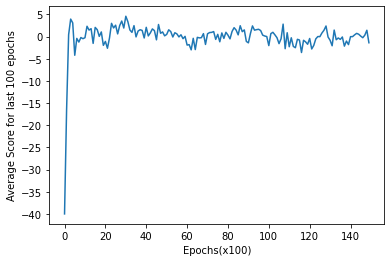

In [5]:
plt.plot(avg_scores)
plt.ylabel('Average Score for last 100 epochs')
plt.xlabel('Epochs(x100)')
plt.yticks(range(-40, 7, 5))
plt.show()

In [ ]:
distribution = [0, 0, 0, 0]
reached = 0
agent.load_models()
max_steps = 6

for i in tqdm(range(5000)):
#     print('----------------------------------------------------------------------------------')
    env = Environment()
    env_cell_mapping = give_mapping(env.cells)
    layout = env_cell_mapping[np.newaxis, :, :, np.newaxis]
    done = False
    episode_reward = 0
    start, dest = env.give_start_dest()
    user_state = [start[0], start[1], dest[0], dest[1]]
    prev_steps_assist = []
    prev_steps_assist = give_prev_steps(prev_steps_assist, memory_len)
    step = 0
    episode_reward = 0
    curr_loc = user_state[:2]
    target_loc = user_state[2:]
    
    while not done and step<max_steps:
#         print(user_state)
        step+=1
        n_steps+=1
        user_action, user_prob, asst_action, asst_prob, vals, asst_state, asst_output_one_hot\
        = agent.choose_action(user_state, layout, prev_steps_assist)
        
#         print(asst_prob)
        
        distribution[asst_action]+=1
        new_loc, reward, _, done = env.step(user_action, asst_action + 1, target_loc, curr_loc)
        
        if done:
            reached+=1
        
#         agent.remember(user_state, asst_state, layout, asst_output_one_hot,\
#                        user_action, user_prob, asst_action, asst_prob, vals, reward, done)
         
        user_state = new_loc + target_loc
        prev_steps_assist = asst_state[1:]
        curr_loc = new_loc
        episode_reward+=reward
        
print(reached)
print(distribution)